In [14]:
%matplotlib widget
import matplotlib.pyplot as plt
import pyspedas
import pytplot

# A basic example using PyTplot with matplotlib widget backend:

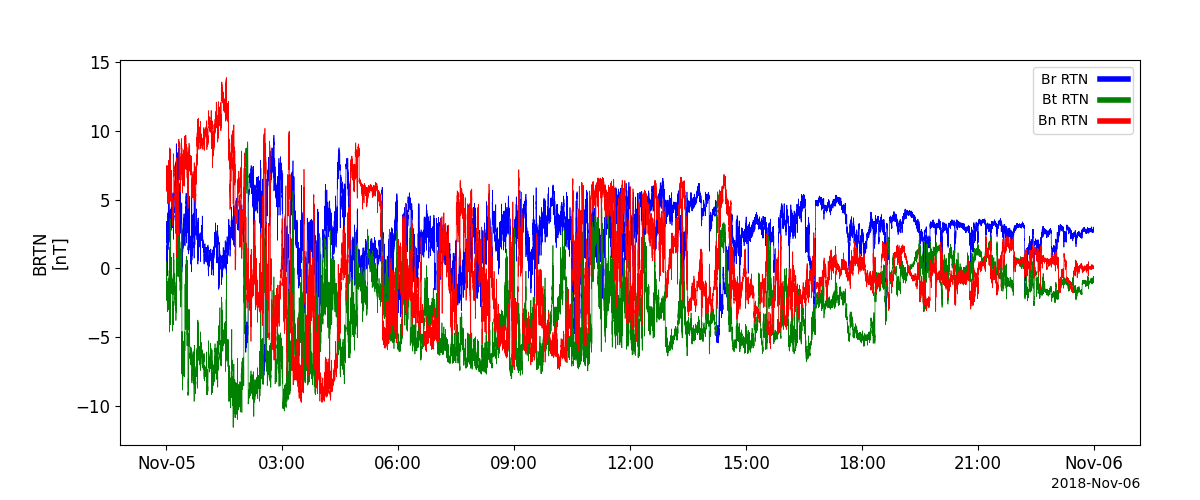

In [18]:
pyspedas.ace.mfi()
pytplot.tplot("BRTN")
plt.tight_layout()

# SciQLop integration

PySPEDAS allows to retrieve variables simply:

In [3]:
mfi_BRTN = await background_run(pyspedas.ace.mfi, notplot=True, no_update=True, varnames=['BRTN'])
mfi_BRTN

{'BRTN': {'x': array([datetime.datetime(2018, 11, 5, 0, 0, 0, 600000),
         datetime.datetime(2018, 11, 5, 0, 0, 1, 600000),
         datetime.datetime(2018, 11, 5, 0, 0, 2, 600000), ...,
         datetime.datetime(2018, 11, 5, 23, 59, 57, 421000),
         datetime.datetime(2018, 11, 5, 23, 59, 58, 421000),
         datetime.datetime(2018, 11, 5, 23, 59, 59, 421000)], dtype=object),
  'y': array([[ 2.009, -1.949,  6.596],
         [ 2.36 , -1.717,  6.739],
         [ 2.392, -1.204,  6.637],
         ...,
         [ 2.726, -0.991,  0.038],
         [ 2.737, -0.979,  0.018],
         [ 2.705, -0.917,  0.021]], dtype=float32)}}

Let's turn it into a SciQLop virtual product

In [10]:
from SciQLop.backend.pipelines_model.easy_provider import  EasyVector
from SciQLop.backend import TimeRange
import numpy as np
from datetime import datetime

def mfi_BRTN_getter(start: datetime, stop: datetime) -> (np.ndarray, np.ndarray):
    mfi_BRTN = pyspedas.ace.mfi(trange=[start,stop], no_update=True, notplot=True, time_clip=True, varnames=['BRTN'])['BRTN']
    timestamp_v = np.vectorize(datetime.timestamp)
    time_vec = timestamp_v(mfi_BRTN['x'])
    return time_vec, mfi_BRTN['y']

mfi_BRTN_product = EasyVector(
    path = "PySPEDAS/ace/mfi/BRTN",
    get_data_callback=mfi_BRTN_getter,
    components_names=['Br', 'Bt', 'Bn'],
    metadata={}
)


Since we set the `no_update` flag to True, let's pre fetch some data

In [6]:
await background_run(pyspedas.ace.mfi,trange=[datetime(2017,12,1),datetime(2018,2,1)], downloadonly=True, notplot=True, varnames=['BRTN'])

['ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171201_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171202_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171203_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171204_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171205_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171206_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171207_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171208_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171209_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171210_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171211_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171212_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171213_v02.cdf',
 'ace_data/mag/level_2_cdaweb/mfi_h3/2017/ac_h3_mfi_20171214_v02.cdf',
 'ace_

Now we can create a new plot panel and plot our PySPEDAS product

**Note** that the integration is really basic and since PySPEDAS is not optimized for this usage the plots will be quite unresponsive. 

In [11]:
p = main_window.new_plot_panel()
p.time_range = TimeRange(datetime(2018,1,1).timestamp(), datetime(2018,1,2).timestamp())

p.plot(mfi_BRTN_product.path)